# Superdense coding


# Decide on message

In [1]:
import random

messages = ['00', '01', '10', '11']
message = random.choice(messages)
print(f'Message is {message}')


Message is 11


## Initialize circuit with a Bell pair, 1 qubit is sent to Bob


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════

## Encode message

In [3]:
ops = {
    '00': (lambda qc: qc),
    '01': (lambda qc: qc.x(0)),
    '10': (lambda qc: qc.z(0)),
    '11': (lambda qc: qc.x(0) and qc.z(0))
}

qc.barrier()
ops[message](qc)

qc.draw()

┌───┐      ░ ┌───┐┌───┐
q_0: ┤ H ├──■───░─┤ X ├┤ Z ├
     └───┘┌─┴─┐ ░ └───┘└───┘
q_1: ─────┤ X ├─░───────────
          └───┘ ░           
c_0: ═══════════════════════
                            
c_1: ═══════════════════════

## Bob decodes message

In [4]:
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.measure(range(2), range(2))
qc.draw()

┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐┌─┐
q_0: ┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├┤M├
     └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─░────────────░─┤ X ├─┤M├──╫─
          └───┘ ░            ░ └───┘ └╥┘  ║ 
c_0: ═════════════════════════════════╬═══╩═
                                      ║     
c_1: ═════════════════════════════════╩═════

## Measure results

Initial message was 11


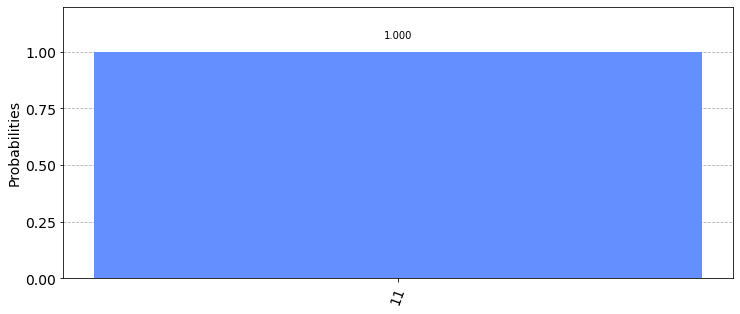

In [5]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

# Execute experiment
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()

print(f'Initial message was {message}')
plot_histogram(counts,  figsize=(12, 5))